Changing the Keras backend from TensorFlow to PlaidML

In [84]:
import os

os.environ["RUNFILES_DIR"] = "/Users/shreyasm/opt/anaconda3/share/plaidml"
os.environ["PLAIDML_NATIVE_PATH"] = "/Users/shreyasm/opt/anaconda3/lib/libplaidml.dylib"
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

Importing libraries (Remember to import Keras using "import keras" and not "import tensorflow.keras")

In [85]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

Setting the hyperparameters

In [86]:

batch_size = 128
num_classes = 10
epochs = 10

Set image dimensions

In [87]:
img_rows, img_cols = 28, 28

Loading the datasets

In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Viewing the images in the dataset

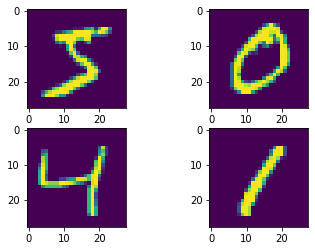

(28, 28)


In [89]:
im, arr = plt.subplots(2,2)
arr[0,0].imshow(x_train[0])
arr[0,1].imshow(x_train[1])
arr[1,0].imshow(x_train[2])
arr[1,1].imshow(x_train[3])
plt.show()
print(x_train[0].shape)

Reshaping our data and normalising the pixel values to range between 0 to 255

In [90]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

These are number of images in our training and test dataset

In [91]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Converting the classes to categorical data

In [92]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Calling the model and adding layers to the Neural Network, then configuring it for training (model.compile)

In [115]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

How our model looks:

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
__________

Training the model

In [117]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=False)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 39s 657us/step - loss: 0.2609 - acc: 0.9206 - val_loss: 0.0567 - val_acc: 0.9815
Epoch 2/15
60000/60000 [==============================] - 35s 579us/step - loss: 0.0885 - acc: 0.9739 - val_loss: 0.0407 - val_acc: 0.9871
Epoch 3/15
60000/60000 [==============================] - 35s 580us/step - loss: 0.0636 - acc: 0.9806 - val_loss: 0.0321 - val_acc: 0.9886
Epoch 4/15
60000/60000 [==============================] - 35s 582us/step - loss: 0.0523 - acc: 0.9839 - val_loss: 0.0317 - val_acc: 0.9892
Epoch 5/15
60000/60000 [==============================] - 35s 583us/step - loss: 0.0440 - acc: 0.9858 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 6/15
60000/60000 [==============================] - 35s 585us/step - loss: 0.0391 - acc: 0.9877 - val_loss: 0.0334 - val_acc: 0.9909
Epoch 7/15
60000/60000 [==============================] - 39s 657us/step - loss: 0.0341 - acc: 0.9897 - val_loss: 0.

Save the model

In [118]:
model.save('trained_model.h5')

Evaluating the performance of the model using accuracy metrics and plotting the loss over iterations

Test loss: 0.035324281811714174
Test accuracy: 0.9913


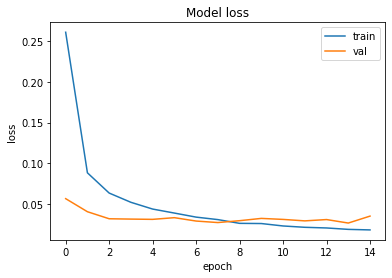

In [119]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

The image to be predicted is

Image of the digit: 


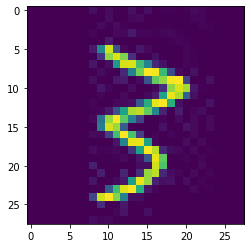

In [120]:
def load_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255
    return img

def run_example(filename):
    predict_val = model.predict(img)
    digit = np.argmax(predict_val)
    print("The predicted digit from the image is:", digit)

#replace 'three.jpeg with the path to your own image
img = load_image('three.jpeg')
print("Image of the digit: ")
plt.imshow(img.reshape(28,28))



Predicting the displayed digit

In [121]:
run_example(img)

The predicted digit from the image is: 3
